<a href="https://colab.research.google.com/github/Sajidcodecrack/Clustering-/blob/main/Assignment4_011222254.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/clustering/data.csv'
data = pd.read_csv(file_path)
print("Dataset header:")
print(data.head())
data = data.values


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset header:
   2.098745172099389933e-01  2.002906846795961204e+00
0                  1.925265                  1.782311
1                  0.885361                  0.141400
2                  1.606608                  1.885941
3                  1.511095                  1.234464
4                  2.248156                  0.440106


In [ ]:
def initialize_centroids(data, k):
    """Randomly initialize k centroids from the dataset."""
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    # Compute all pairwise distances between data points and centroids
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)  # Vectorzation fucntion used in here
    return np.argmin(distances, axis=1)

def update_centroids(data, clusters, k):
    centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            centroids.append(np.mean(cluster_points, axis=0))
        else:
        # empty clusteing
            centroids.append(data[np.random.choice(data.shape[0])])
    return np.array(centroids)

def k_means(data, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k)

    for _ in range(max_iters):

        clusters = assign_clusters(data, centroids)

        new_centroids = update_centroids(data, clusters, k)

        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids

    return centroids, clusters


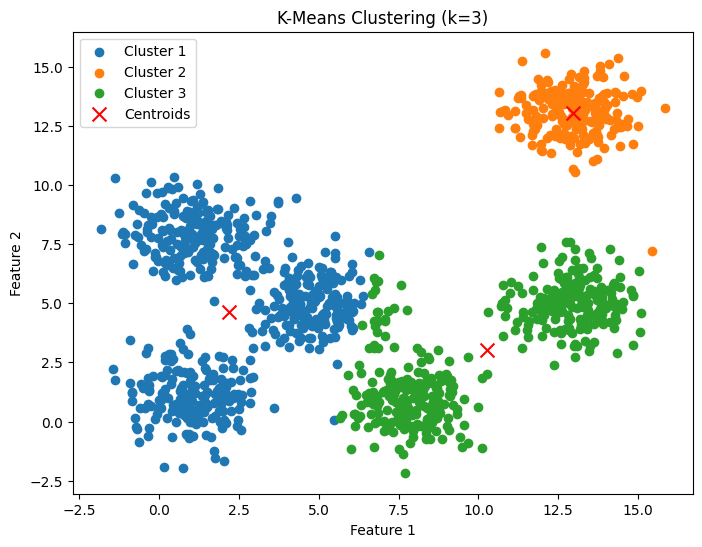

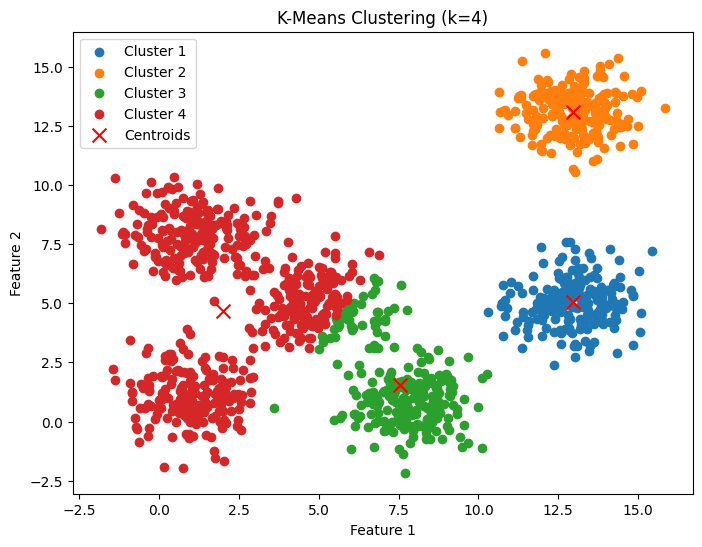

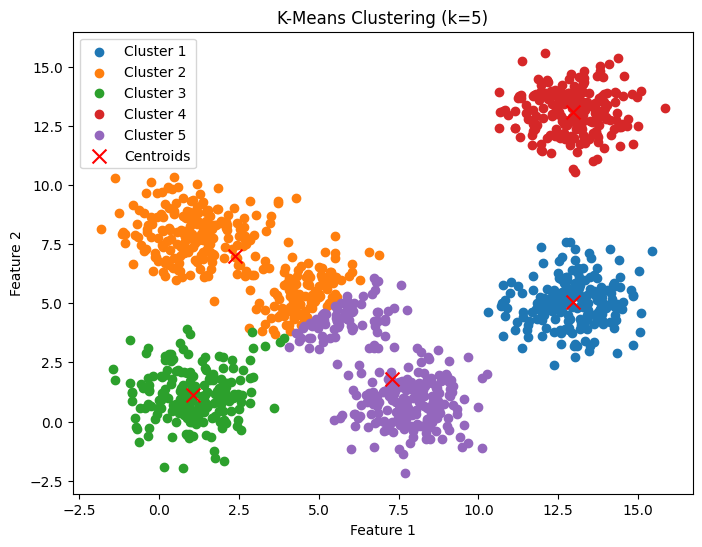

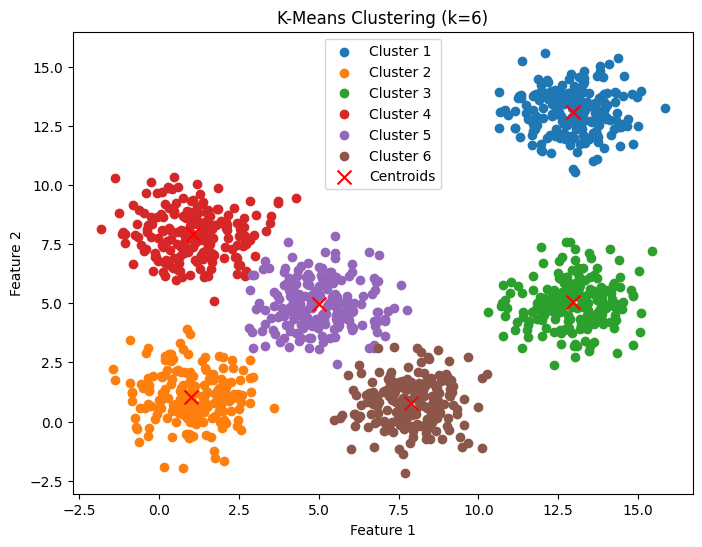

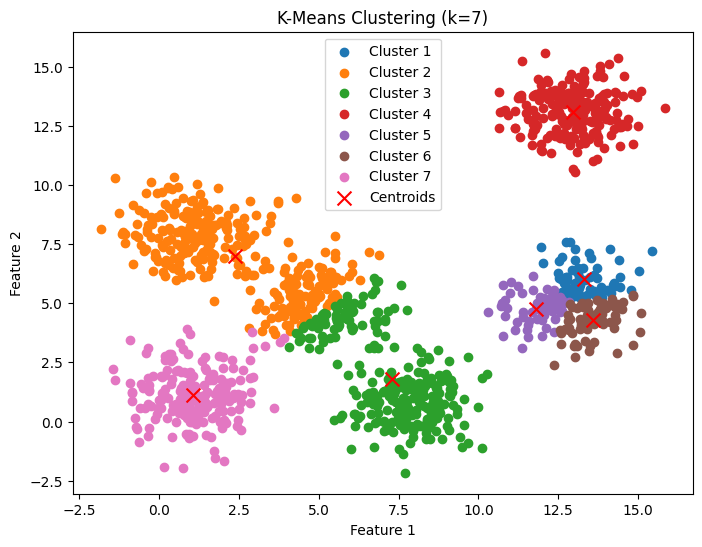

In [ ]:

if data.shape[1] > 2:
    data = data[:, :2]

k_values = [3, 4, 5, 6, 7]

for k in k_values:
    centroids, clusters = k_means(data, k)

    plt.figure(figsize=(8, 6))
    for i in range(k):
        cluster_points = data[clusters == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")


    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroids')

    plt.title(f"K-Means Clustering (k={k})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
